In [1]:
import pandas as pd
import numpy as np

In [80]:
data = pd.read_csv('C:\\Users\\Siddharth\\Desktop\\Projects\\Credit card fraud detection\\creditcard.csv')
#data.head(5)

Train-test split (80-20)

In [88]:
# Train-test split #
from sklearn.model_selection import train_test_split
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

# Scaling the training data set
#X_train -= X_train.min()  # equivalent to df = df - df.min()
#X_train /= X_train.max()  # equivalent to df = df / df.max()
#X_train['Class'] = X_train['Class'].astype(int)
#X_train.head(5)

# Scaling the test data set
#X_test -= X_test.min()  # equivalent to df = df - df.min()
#X_test /= X_test.max()  # equivalent to df = df / df.max()
#X_test['Class'] = X_test['Class'].astype(int)
#X_test.head(5)

Building a base model using Logistic Regression; Evaluting it using Accuracy and Precision-Recall score

Model accuracy: 99.92%
Average precision-recall score: 0.67


Text(0.5,1,'2-class Precision-Recall curve: AP=0.67')

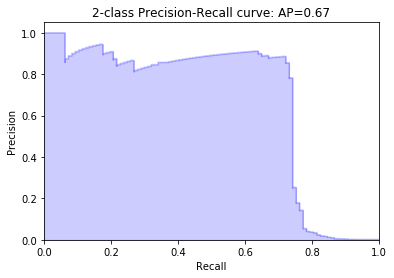

In [93]:
from sklearn.linear_model import LogisticRegression
blr = LogisticRegression(penalty='l2',solver = 'lbfgs', multi_class = 'ovr').fit(X_train, y_train)
y_pred = blr.predict(X_test)
y_score = blr.decision_function(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = (tn+tp)/(tn+fp+fn+tp)*100
#model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}%'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Logistic Regression through Cross-Validation; Model Evaluation

Model accuracy: 99.94%
Average precision-recall score: 0.77


Text(0.5,1,'2-class Precision-Recall curve: AP=0.77')

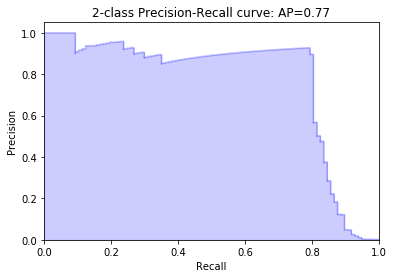

In [102]:
#Logistic Regreession - Optimization through Cross-Validation #
from sklearn.linear_model import LogisticRegressionCV
LR = LogisticRegressionCV(cv = 10, random_state = 0).fit(X_train,y_train)
y_pred = LR.predict(X_test) #array of predicted classes
y_score = LR.decision_function(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = (tn+tp)/(tn+fp+fn+tp)*100
#model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}%'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

#Confusion_Matrix

#LR.coef_

Ensemble with Logistic Regression as the base estimator

Model accuracy: 99.92%
Average precision-recall score: 0.64


Text(0.5,1,'2-class Precision-Recall curve: AP=0.64')

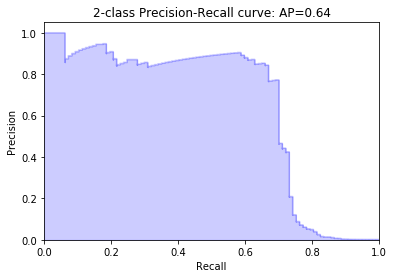

In [113]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators = 15, 
                            bootstrap = True, max_samples = 1.0, max_features = 1.0).fit(X_train,y_train)
y_pred = bagging.predict(X_test)
y_score = bagging.decision_function(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = (tn+tp)/(tn+fp+fn+tp)*100
#model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}%'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Ensemble with LogisticRegressionCV as the base estimator

Model accuracy: 99.95%
Average precision-recall score: 0.82


Text(0.5,1,'2-class Precision-Recall curve: AP=0.82')

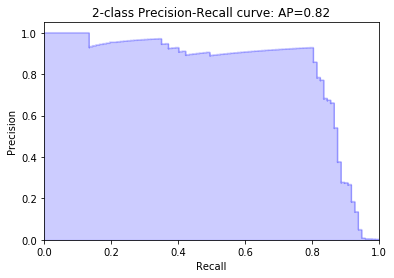

In [112]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegressionCV(cv = 5, random_state = 0), n_estimators = 5, 
                            bootstrap = True, max_samples = 1.0, max_features = 1.0).fit(X_train,y_train)
y_pred = bagging.predict(X_test)
y_score = bagging.decision_function(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = (tn+tp)/(tn+fp+fn+tp)*100
#model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}%'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))